# Plot the Results of the Edge Classification
---

## Imports & Global Information

In [5]:
import glob, os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import pprint
from sklearn.metrics import confusion_matrix

# Utilities for plotting
sys.path.append("../")
from utils.plotting import plot_stt, plot_isochrones

In [6]:
# to get access to the pdg database 2024 version
import pdg

PdgApi = pdg.connect(
    "sqlite:////home/nikin105/mlProject/data/pdg/pdgall-2024-v0.1.0.sqlite"
)

## Data Input and Image Output Paths

In [7]:
channel = "mum5mup5"
project_name = "layerwise_100k"
event_num = 1457
save_figs = True

image_dir = f"/home/nikin105/sciebo/Doktor/ML-Project/Images/machineLearning/{channel}/{project_name}/classification/"
os.makedirs(image_dir, exist_ok=True)
input_dir = f"/home/nikin105/mlProject/data/machineLearning/{channel}/classification/{project_name}/test/"
proc_files = sorted(glob.glob(os.path.join(input_dir, "*")))
data = torch.load(f"{input_dir}/{event_num}", map_location="cpu")

## Inspect the Data

In [8]:
for key in data.keys:
    print(key, ":")
    if key == "event_file":
        pprint.pp(data[key])
    elif key == "multi_hit_particle_ids":
        pprint.pp(data[key][0:10])
    elif data[key].ndim == 2:
        pprint.pp(data[key][0:10, 0:10])
    else:
        pprint.pp(data[key][0:10])
    print()

n_multi_hits :
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

r_out :
tensor([0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000], dtype=torch.float64)

x :
tensor([[0.4254, 0.9401, 0.7847],
        [0.4408, 0.9469, 0.9045],
        [0.4492, 0.9389, 0.8300],
        [0.4644, 0.9454, 0.8955],
        [0.4731, 0.9377, 0.8565],
        [0.4881, 0.9440, 0.9045],
        [0.4969, 0.9367, 0.8781],
        [0.5118, 0.9427, 0.8810],
        [0.5208, 0.9358, 0.8699],
        [0.5356, 0.9415, 0.9035]], grad_fn=<SliceBackward0>)

y_pid :
tensor([ True, False, False, False, False, False, False, False, False, False])

pt :
tensor([0.4010, 0.4011, 0.4011, 0.4011, 0.4011, 0.4011, 0.4010, 0.4010, 0.4009,
        0.4009], dtype=torch.float64)

mc_mom :
tensor([[ 0.3544, -0.1876,  0.1589],
        [ 0.3529, -0.1906,  0.1586],
        [ 0.3514, -0.1933,  0.1583],
        [ 0.3498, -0.1962,  0.1584],
        [ 0.3487, -0.1983,  0.1581],
        [ 0.3473, -0.2007,  0.1581],
   

## Plot Graphs

#### Data Preparation

In [9]:
# Convert hit positions from scaled polar coordinates to cartesian coordinates
r = data.x[:, 0].detach().numpy() * 42
phi = data.x[:, 1].detach().numpy() * 2 * np.pi
isochrones = data.x[:, 2].detach().numpy() * 0.5

x = r * np.cos(phi)
y = r * np.sin(phi)

# Get the number of hits
n_hits = len(data.x)

# Prepare the colors for the different pids
pid_color_palette = sns.color_palette("tab20")

# Rename some variables for better readability
gt = data.true_edges
input_edges = torch.cat([data.edge_index, data.edge_index.flip(0)], dim=-1)
edge_labels = data.y_pid.repeat(2)
hid = data.hid
pids = data.pid
pdg_codes = data.pdgcode
edge_scores = data.scores
true_scores = edge_scores[edge_labels == 1]
false_scores = edge_scores[edge_labels == 0]

# Get true and false input edges
true_input_edges = input_edges[:, edge_labels == 1]
false_input_edges = input_edges[:, edge_labels == 0]

# Get the unique particle ids
unique_pids = np.unique(pids)

#### Edge Scores

Saving figure to /home/nikin105/sciebo/Doktor/ML-Project/Images/machineLearning/mum5mup5/layerwise_100k/classification//edge_scores_1457.png
Saving figure to /home/nikin105/sciebo/Doktor/ML-Project/Images/machineLearning/mum5mup5/layerwise_100k/classification//edge_scores_1457.pdf


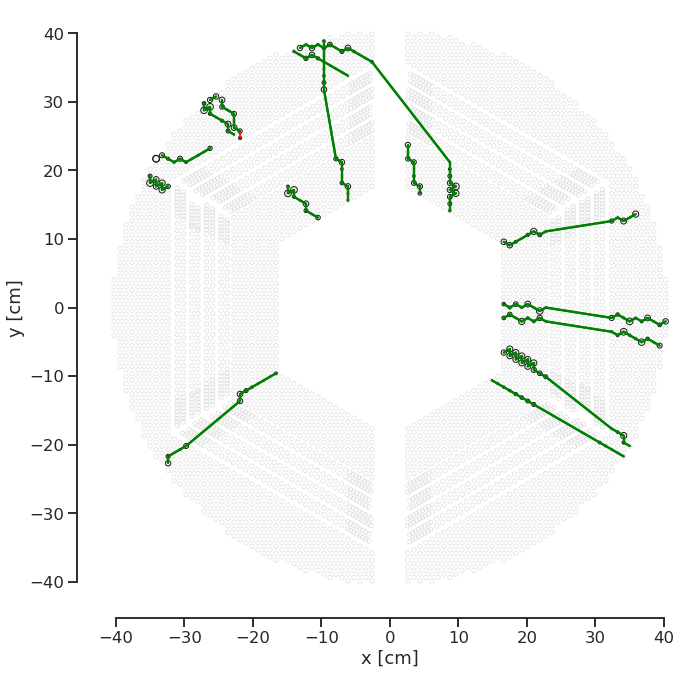

In [61]:
isochrone_circles = plot_isochrones(x, y, isochrones, hid)

fig, ax = plot_stt(useGrayScale=True, alpha=0.5)

# plot nodes
for circle in isochrone_circles:
    ax.add_artist(circle)

# plot edges
for i_edge in range(len(input_edges[0])):
    if edge_scores[i_edge].item() < 0.8:
        continue
    x_start = x[input_edges[0][i_edge]]
    x_end = x[input_edges[1][i_edge]]
    y_start = y[input_edges[0][i_edge]]
    y_end = y[input_edges[1][i_edge]]
    if edge_labels[i_edge]:
        edge_color = "green"
    else:
        edge_color = "red"
    ax.plot(
        [x_start, x_end],
        [y_start, y_end],
        color=edge_color,
        alpha=edge_scores[i_edge].item(),
    )

fig.tight_layout()

if save_figs:
    print(f"Saving figure to {image_dir}/edge_scores_{event_num}.png")
    plt.savefig(f"{image_dir}/edge_scores_{event_num}.png", dpi=300)
    print(f"Saving figure to {image_dir}/edge_scores_{event_num}.pdf")
    plt.savefig(f"{image_dir}/edge_scores_{event_num}.pdf", dpi=300)
else:
    plt.show()

### Edge Scores for True Edges

Saving figure to /home/nikin105/sciebo/Doktor/ML-Project/Images/machineLearning/mum5mup5/layerwise_100k/classification//true_edge_scores_1457.png
Saving figure to /home/nikin105/sciebo/Doktor/ML-Project/Images/machineLearning/mum5mup5/layerwise_100k/classification//true_edge_scores_1457.pdf


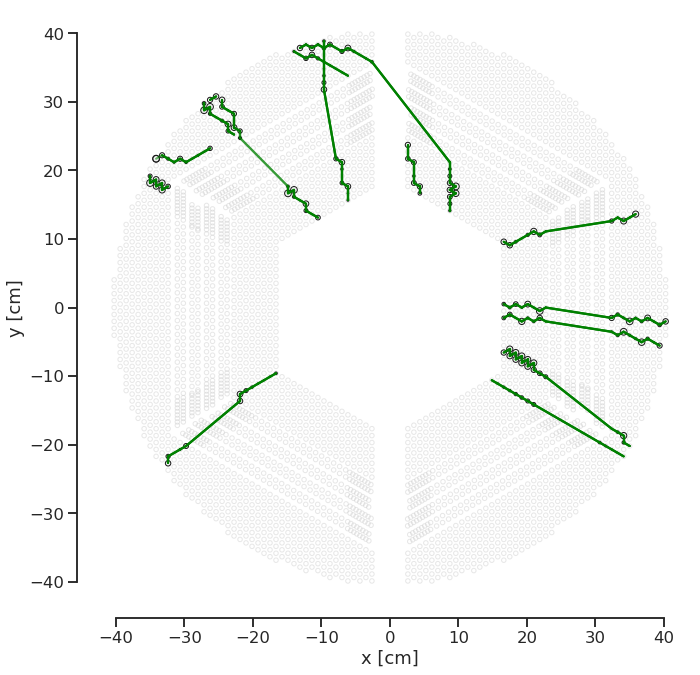

In [11]:
isochrone_circles = plot_isochrones(x, y, isochrones, hid)

fig, ax = plot_stt(useGrayScale=True, alpha=0.5)

# plot nodes
for circle in isochrone_circles:
    ax.add_artist(circle)

# plot edges
for i_edge in range(len(true_input_edges[0])):
    if true_scores[i_edge].item() < 0.5:
        continue
    x_start = x[true_input_edges[0][i_edge]]
    x_end = x[true_input_edges[1][i_edge]]
    y_start = y[true_input_edges[0][i_edge]]
    y_end = y[true_input_edges[1][i_edge]]
    ax.plot(
        [x_start, x_end],
        [y_start, y_end],
        color="green",
        alpha=true_scores[i_edge].item(),
    )

fig.tight_layout()

if save_figs:
    print(f"Saving figure to {image_dir}/true_edge_scores_{event_num}.png")
    plt.savefig(f"{image_dir}/true_edge_scores_{event_num}.png", dpi=300)
    print(f"Saving figure to {image_dir}/true_edge_scores_{event_num}.pdf")
    plt.savefig(f"{image_dir}/true_edge_scores_{event_num}.pdf", dpi=300)
else:
    plt.show()

### Edge Scores for False Edges

Saving figure to /home/nikin105/sciebo/Doktor/ML-Project/Images/machineLearning/mum5mup5/layerwise_100k/classification//false_edge_scores_1457.png
Saving figure to /home/nikin105/sciebo/Doktor/ML-Project/Images/machineLearning/mum5mup5/layerwise_100k/classification//false_edge_scores_1457.pdf


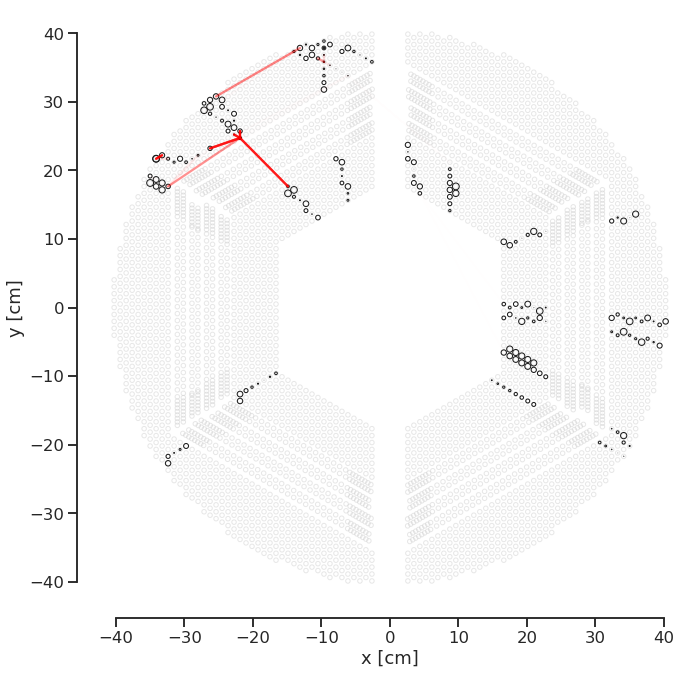

In [12]:
isochrone_circles = plot_isochrones(x, y, isochrones, hid)

fig, ax = plot_stt(useGrayScale=True, alpha=0.5)

# plot nodes
for circle in isochrone_circles:
    ax.add_artist(circle)

# plot edges
for i_edge in range(len(false_input_edges[0])):
    if not edge_labels[i_edge]:
        x_start = x[false_input_edges[0][i_edge]]
        x_end = x[false_input_edges[1][i_edge]]
        y_start = y[false_input_edges[0][i_edge]]
        y_end = y[false_input_edges[1][i_edge]]
        ax.plot(
            [x_start, x_end],
            [y_start, y_end],
            color="red",
            alpha=false_scores[i_edge].item(),
        )

fig.tight_layout()

if save_figs:
    print(f"Saving figure to {image_dir}/false_edge_scores_{event_num}.png")
    plt.savefig(f"{image_dir}/false_edge_scores_{event_num}.png", dpi=300)
    print(f"Saving figure to {image_dir}/false_edge_scores_{event_num}.pdf")
    plt.savefig(f"{image_dir}/false_edge_scores_{event_num}.pdf", dpi=300)
else:
    plt.show()

### Differences Between Real and Assigned Score

Saving figure to /home/nikin105/sciebo/Doktor/ML-Project/Images/machineLearning/mum5mup5/layerwise_100k/classification//edge_score_diff_1457.png
Saving figure to /home/nikin105/sciebo/Doktor/ML-Project/Images/machineLearning/mum5mup5/layerwise_100k/classification//edge_score_diff_1457.pdf


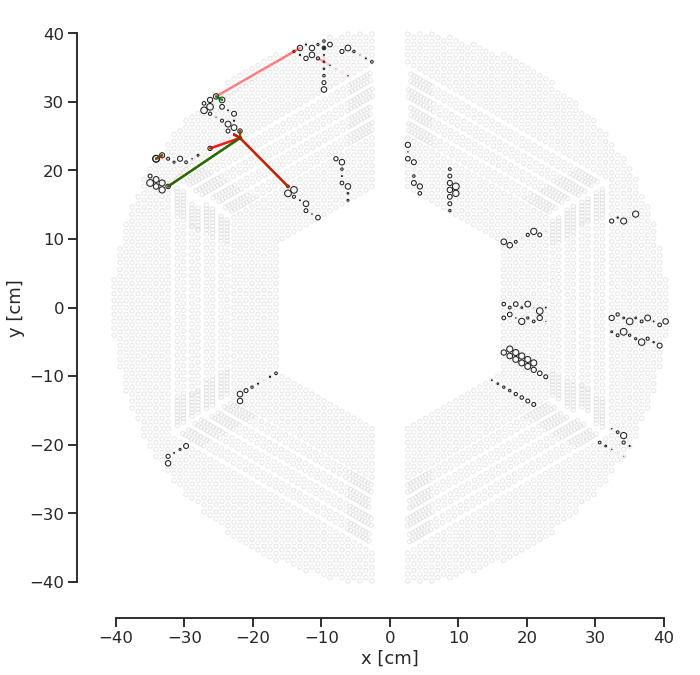

In [60]:
isochrone_circles = plot_isochrones(x, y, isochrones, hid)

fig, ax = plot_stt(useGrayScale=True, alpha=0.5)

# plot nodes
for circle in isochrone_circles:
    ax.add_artist(circle)

# plot edges
for i_edge in range(len(input_edges[0])):
    if edge_scores[i_edge].item() > 0.8:
        continue
    x_start = x[input_edges[0][i_edge]]
    x_end = x[input_edges[1][i_edge]]
    y_start = y[input_edges[0][i_edge]]
    y_end = y[input_edges[1][i_edge]]
    if edge_labels[i_edge]:
        edge_color = "green"
    else:
        edge_color = "red"
    ax.plot(
        [x_start, x_end],
        [y_start, y_end],
        color=edge_color,
        alpha=abs(edge_scores[i_edge].item() - edge_labels[i_edge].item()),
    )

fig.tight_layout()

if save_figs:
    print(f"Saving figure to {image_dir}/edge_score_diff_{event_num}.png")
    plt.savefig(f"{image_dir}/edge_score_diff_{event_num}.png", dpi=300)
    print(f"Saving figure to {image_dir}/edge_score_diff_{event_num}.pdf")
    plt.savefig(f"{image_dir}/edge_score_diff_{event_num}.pdf", dpi=300)
else:
    plt.show()

## Plot Network Performance

### Data Preparation

In [14]:
proc_files = sorted(glob.glob(os.path.join(input_dir, "*")))

full_df = pd.DataFrame({"score": [], "label": []})
for file in proc_files:
    d = torch.load(file, map_location="cpu")
    df = pd.DataFrame({"score": d.scores, "label": d.y_pid.repeat(2)})
    full_df = pd.concat([full_df, df], ignore_index=True)
full_df

,score,label
0,0.999996,1.0
1,0.000005,0.0
2,0.000001,0.0
3,0.000357,0.0
4,0.000006,0.0
...,...,...
16542743,0.999996,1.0
16542744,0.000002,0.0
16542745,0.999996,1.0
16542746,0.000002,0.0


### Model Output

bin width: 0.024000000000000007
Saving figure to /home/nikin105/sciebo/Doktor/ML-Project/Images/machineLearning/mum5mup5/layerwise_100k/classification//edge_score_dist.png
Saving figure to /home/nikin105/sciebo/Doktor/ML-Project/Images/machineLearning/mum5mup5/layerwise_100k/classification//edge_score_dist.pdf


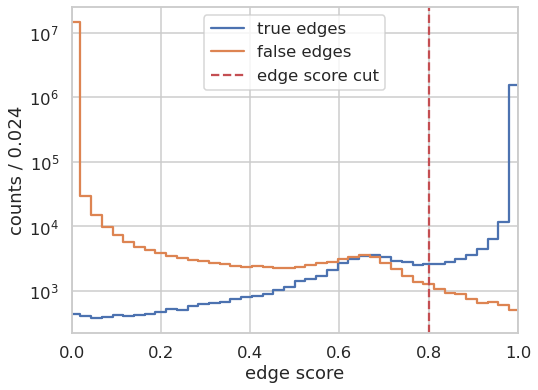

In [55]:
sns.set_theme(style="whitegrid", context="talk")

fig, ax = plt.subplots(figsize=(8, 6))
bins = np.linspace(-0.1, 1.1, 51)
bin_width = bins[1] - bins[0]
print("bin width:", bin_width)
sns.histplot(
    full_df[full_df.label == 1],
    x="score",
    bins=bins,
    ax=ax,
    element="step",
    fill=False,
    label="true edges",
)
sns.histplot(
    full_df[full_df.label == 0],
    x="score",
    bins=bins,
    ax=ax,
    element="step",
    fill=False,
    label="false edges",
)
ax.axvline(0.8, color="r", linestyle="--", label="edge score cut")
ax.set_yscale("log")
ax.set_xlim(0, 1)
ax.legend(loc="upper center")
ax.set_xlabel("edge score")
ax.set_ylabel(f"counts / {bin_width:.3f}")
if save_figs:
    print(f"Saving figure to {image_dir}/edge_score_dist.png")
    plt.savefig(f"{image_dir}/edge_score_dist.png", dpi=300)
    print(f"Saving figure to {image_dir}/edge_score_dist.pdf")
    plt.savefig(f"{image_dir}/edge_score_dist.pdf", dpi=300)
else:
    plt.show()

### Edge Score Cut

In [16]:
n_cuts = 1000
score_cuts = np.linspace(0, 1, n_cuts)
true_positive_rate = np.zeros(n_cuts)
false_positive_rate = np.zeros(n_cuts)
signal_efficiency = np.zeros(n_cuts)
background_rejection_rate = np.zeros(n_cuts)
n_positive_edges = len(full_df[full_df.label == 1])
n_negative_edges = len(full_df[full_df.label == 0])
# Edge scores for true edges
positive_scores = full_df[full_df.label == 1].score.values
# Edge scores for false edges
negative_scores = full_df[full_df.label == 0].score.values
i = 0
for cut in score_cuts:
    # True edges that survive the score cut
    n_true_positive = len(positive_scores[positive_scores > cut])
    # False edges that survive the score cut
    n_false_positive = len(negative_scores[negative_scores > cut])
    # False edges that do not survive the score cut
    n_true_negative = len(negative_scores[negative_scores <= cut])
    # True edges that do not survive the score cut
    n_false_negative = len(positive_scores[positive_scores <= cut])
    # Calculate the TPR and FPR
    true_positive_rate[i] = n_true_positive / (n_true_positive + n_false_negative)
    false_positive_rate[i] = n_false_positive / (n_false_positive + n_true_negative)
    # Calculate the signal efficiency and background rejection rate
    signal_efficiency[i] = n_true_positive / n_positive_edges
    background_rejection_rate[i] = n_true_negative / n_negative_edges
    i += 1

In [57]:
i = np.where(score_cuts > 0.8)[0][0]
print(i)
print("True Positive Rate:", true_positive_rate[i])
print("False Positive Rate:", false_positive_rate[i])
print("Signal Efficiency:", signal_efficiency[i])
print("Background Rejection Rate:", background_rejection_rate[i])


800
True Positive Rate: 0.9726041810715423
False Positive Rate: 0.00044833381251487784
Signal Efficiency: 0.9726041810715423
Background Rejection Rate: 0.9995516661874851


Saving figure to /home/nikin105/sciebo/Doktor/ML-Project/Images/machineLearning/mum5mup5/layerwise_100k/classification//purity_vs_eff.png
Saving figure to /home/nikin105/sciebo/Doktor/ML-Project/Images/machineLearning/mum5mup5/layerwise_100k/classification//purity_vs_eff.pdf


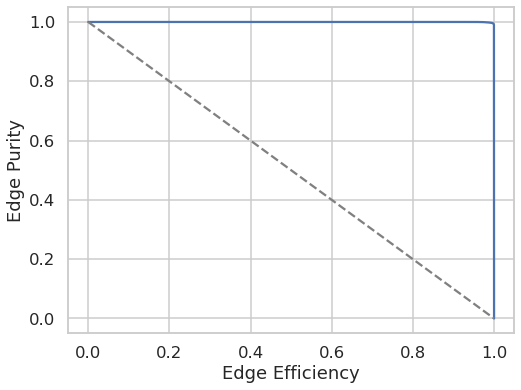

In [17]:
plt.close("all")
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(true_positive_rate, 1 - false_positive_rate)
ax.set_xlabel("Edge Efficiency")
ax.set_ylabel("Edge Purity")
ax.plot((0,1),(1,0), linestyle="--", color="gray")

if save_figs:
    print(f"Saving figure to {image_dir}/purity_vs_eff.png")
    plt.savefig(f"{image_dir}/purity_vs_eff.png", dpi=300)
    print(f"Saving figure to {image_dir}/purity_vs_eff.pdf")
    plt.savefig(f"{image_dir}/purity_vs_eff.pdf", dpi=300)
else:
    plt.show()

Saving figure to /home/nikin105/sciebo/Doktor/ML-Project/Images/machineLearning/mum5mup5/layerwise_100k/classification//bkg_rejection_vs_eff.png
Saving figure to /home/nikin105/sciebo/Doktor/ML-Project/Images/machineLearning/mum5mup5/layerwise_100k/classification//bkg_rejection_vs_eff.pdf


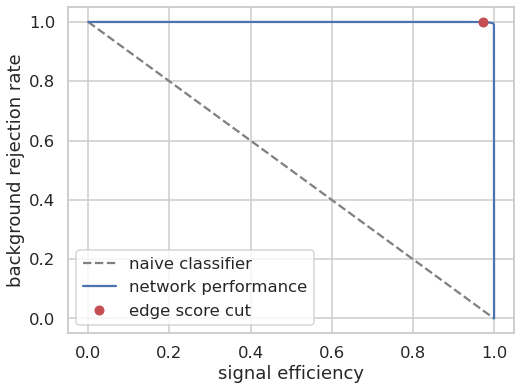

In [58]:
plt.close("all")

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot((0,1),(1,0), linestyle="--", color="gray", label="naive classifier")
ax.plot(signal_efficiency, background_rejection_rate, label="network performance")
ax.plot(signal_efficiency[800], background_rejection_rate[800], "ro", label="edge score cut")
ax.set_xlabel("signal efficiency")
ax.set_ylabel("background rejection rate")
ax.legend()
if save_figs:
    print(f"Saving figure to {image_dir}/bkg_rejection_vs_eff.png")
    plt.savefig(f"{image_dir}/bkg_rejection_vs_eff.png", dpi=300)
    print(f"Saving figure to {image_dir}/bkg_rejection_vs_eff.pdf")
    plt.savefig(f"{image_dir}/bkg_rejection_vs_eff.pdf", dpi=300)
else:
    plt.show()


Saving figure to /home/nikin105/sciebo/Doktor/ML-Project/Images/machineLearning/mum5mup5/layerwise_100k/classification//bkg_rejection_vs_eff_zoom.png
Saving figure to /home/nikin105/sciebo/Doktor/ML-Project/Images/machineLearning/mum5mup5/layerwise_100k/classification//bkg_rejection_vs_eff_zoom.pdf


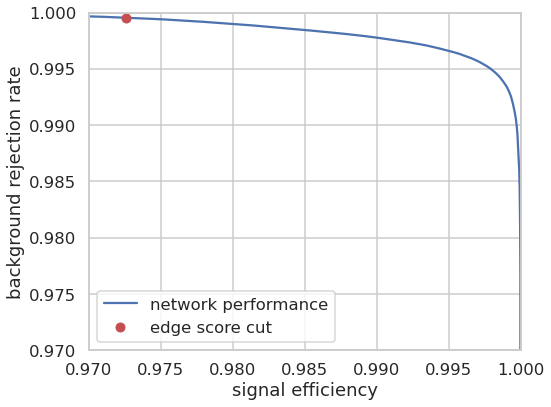

In [59]:
plt.close("all")

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(signal_efficiency, background_rejection_rate, label="network performance")
ax.plot(signal_efficiency[800], background_rejection_rate[800], "ro", label="edge score cut")
ax.set_xlabel("signal efficiency")
ax.set_ylabel("background rejection rate")
ax.set_ylim(0.97, 1)
ax.set_xlim(0.97, 1)
ax.legend()
fig.tight_layout()
if save_figs:
    print(f"Saving figure to {image_dir}/bkg_rejection_vs_eff_zoom.png")
    plt.savefig(f"{image_dir}/bkg_rejection_vs_eff_zoom.png", dpi=300)
    print(f"Saving figure to {image_dir}/bkg_rejection_vs_eff_zoom.pdf")
    plt.savefig(f"{image_dir}/bkg_rejection_vs_eff_zoom.pdf", dpi=300)
else:
    plt.show()


In [19]:
y_pred = np.zeros(len(full_df.score))

for i in range(len(full_df.score)):
    if full_df.score[i] > score_cuts[cut]:
        y_pred[i] = 1

cm = confusion_matrix(full_df.y_pid, y_pred)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

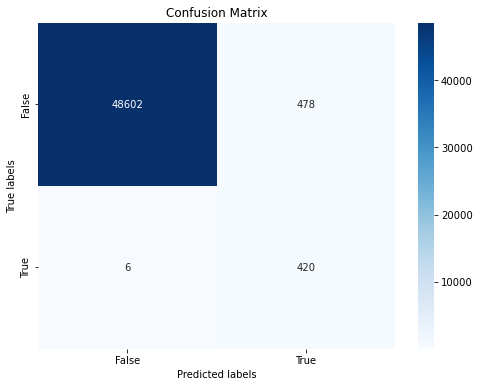

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=np.unique(y_pid),
    yticklabels=np.unique(y_pid),
)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()